# 1. Install Dependencies and Setup

In [4]:
# !pip install tensorflow tensorflow-gpu opencv-python matplotlib
!pip install --upgrade setuptools pip wheel


  Using cached setuptools-70.3.0-py3-none-any.whl.metadata (5.8 kB)
Using cached setuptools-70.3.0-py3-none-any.whl (931 kB)
   ---------------------------------------- 0.0/65.8 kB ? eta -:--:--
   ------------------ --------------------- 30.7/65.8 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 65.8/65.8 kB 590.8 kB/s eta 0:00:00


In [3]:
!pip install tensorflow
!pip install opencv-python
!pip install matplotlib


In [1]:
print("hell")

hell


In [12]:
!pip list

Package                 Version
----------------------- -----------
absl-py                 2.1.0
asttokens               2.4.1
astunparse              1.6.3
certifi                 2024.7.4
charset-normalizer      3.3.2
colorama                0.4.6
comm                    0.2.2
contourpy               1.2.1
cycler                  0.12.1
debugpy                 1.8.2
decorator               5.1.1
executing               2.0.1
flatbuffers             24.3.25
fonttools               4.53.1
gast                    0.6.0
google-pasta            0.2.0
grpcio                  1.64.1
h5py                    3.11.0
idna                    3.7
ipykernel               6.29.5
ipython                 8.26.0
jedi                    0.19.1
jupyter_client          8.6.2
jupyter_core            5.7.2
keras                   3.4.1
kiwisolver              1.4.5
libclang                18.1.1
Markdown                3.6
markdown-it-py          3.0.0
MarkupSafe              2.1.5
matplotlib             

In [13]:
import tensorflow as tf
import os

In [14]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [15]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [16]:
import cv2
import imghdr

In [17]:
data_dir = 'data' 

In [18]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [19]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [20]:
import numpy as np
from matplotlib import pyplot as plt

In [21]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [22]:
data_iterator = data.as_numpy_iterator()

In [23]:
batch = data_iterator.next()

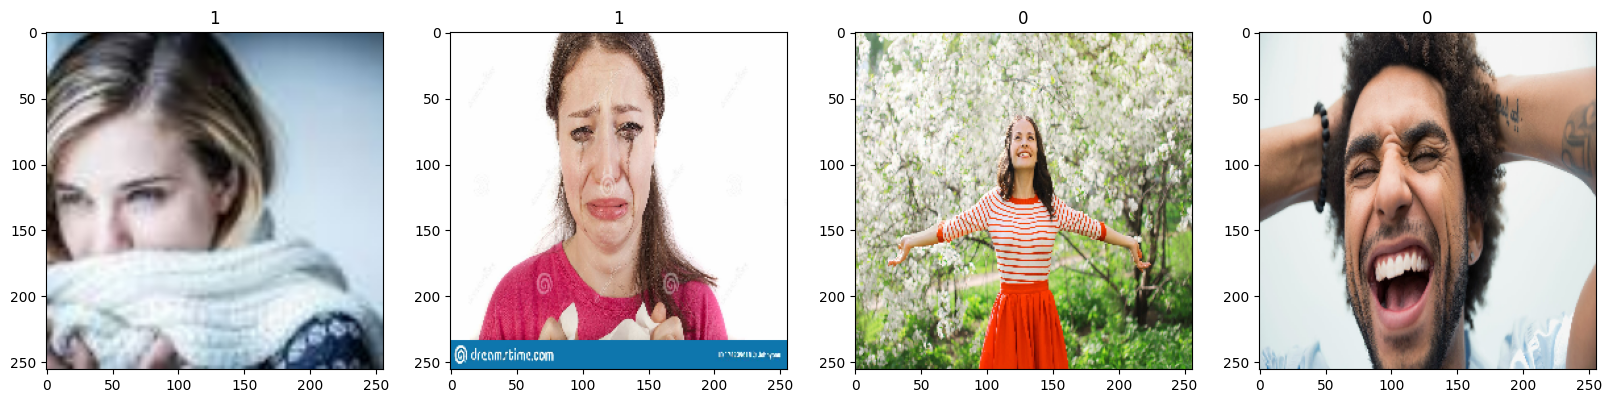

In [24]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [25]:
data = data.map(lambda x,y: (x/255, y))

In [26]:
data.as_numpy_iterator().next()

(array([[[[0.7607843 , 0.6156863 , 0.4117647 ],
          [0.7614277 , 0.61632967, 0.41240808],
          [0.7657782 , 0.62068015, 0.41675857],
          ...,
          [0.74509805, 0.6156863 , 0.44705883],
          [0.74509805, 0.6156863 , 0.44705883],
          [0.74509805, 0.6156863 , 0.44705883]],
 
         [[0.7608995 , 0.61580145, 0.4118799 ],
          [0.763534  , 0.618436  , 0.4145144 ],
          [0.7678845 , 0.62278646, 0.41886488],
          ...,
          [0.74720436, 0.6177926 , 0.44916514],
          [0.74720436, 0.6177926 , 0.44916514],
          [0.74720436, 0.6177926 , 0.44916514]],
 
         [[0.76189494, 0.61679685, 0.4128753 ],
          [0.7662454 , 0.6211474 , 0.4172258 ],
          [0.7705959 , 0.6254979 , 0.4215763 ],
          ...,
          [0.7490196 , 0.61960787, 0.4509804 ],
          [0.7490196 , 0.61960787, 0.4509804 ],
          [0.7490196 , 0.61960787, 0.4509804 ]],
 
         ...,
 
         [[0.29528037, 0.15533094, 0.05141243],
          [0.34773

# 5. Split Data

In [27]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [28]:
train_size

7

In [29]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [30]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [36]:
model = Sequential()

In [37]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [38]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [40]:
logdir='logs'

In [41]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [42]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 331ms/step - accuracy: 0.5214 - loss: 0.9162 - val_accuracy: 0.5781 - val_loss: 0.6294
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 321ms/step - accuracy: 0.5888 - loss: 0.6040 - val_accuracy: 0.8125 - val_loss: 0.5633
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 267ms/step - accuracy: 0.7536 - loss: 0.5453 - val_accuracy: 0.8281 - val_loss: 0.4747
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 253ms/step - accuracy: 0.8117 - loss: 0.4957 - val_accuracy: 0.8594 - val_loss: 0.3814
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 256ms/step - accuracy: 0.8474 - loss: 0.4383 - val_accuracy: 0.8438 - val_loss: 0.4162
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 292ms/step - accuracy: 0.8313 - loss: 0.3868 - val_accuracy: 0.9062 - val_loss: 0.2528
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 275ms/step - accuracy: 0.9181 - loss: 0.2481 - val_accuracy: 0.8906 - val_loss: 0.3569
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 282ms/step - accuracy: 0.8792 - loss: 0.2638 - val_accuracy: 0.9375 - val_loss:

# 8. Plot Performance

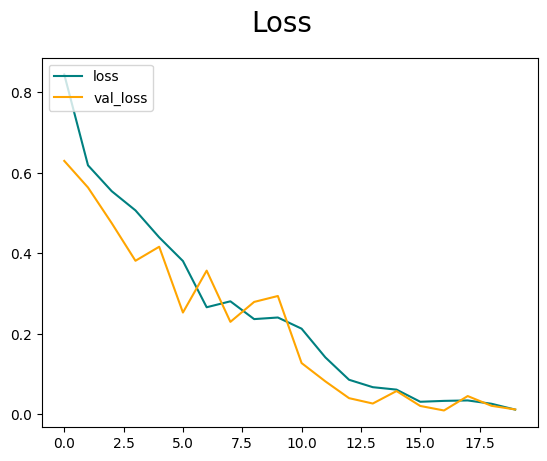

In [43]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

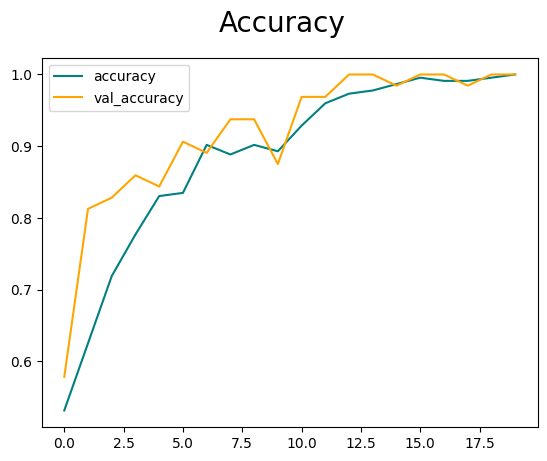

In [44]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [45]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [46]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [47]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


In [50]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


# 10. Test

In [39]:
import cv2

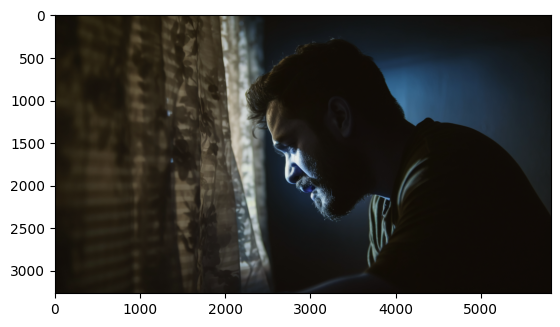

In [51]:
img = cv2.imread('manny.jpg')
plt.imshow(img)
plt.show()

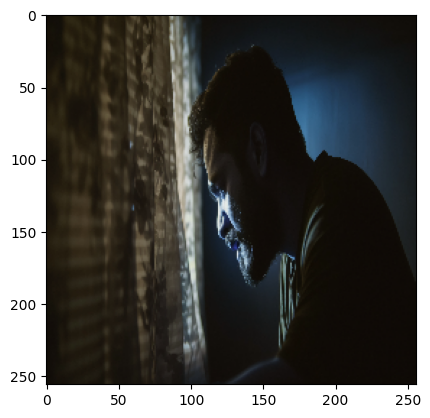

In [52]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [53]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


In [54]:
yhat

array([[0.940762]], dtype=float32)

In [55]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# 11. Save the Model

In [56]:
from tensorflow.keras.models import load_model

In [57]:
model.save(os.path.join('models','happysadmodel.h5'))

In [58]:
new_model = load_model('models/happysadmodel.h5')

In [59]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


array([[0.940762]], dtype=float32)